# Estimating Economic Growth using Deep Learning

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers, callbacks

In [2]:
data = pd.read_csv('data_change_final.csv')
data

,foreign_direct_investment,gross_savings,unemployment,labor_force,mortality_rate,new_businesses_registered,education_expenditure,age_dependency_ratio,food_production_index,human_capital_index,...,tobacco_use,profit_tax,population,literacy_rate,birth_rate,death_rate,migration,agriculture_forestry_fishing,industry,gdp_per_capita_change
0,1.752828e+08,8.587249e+10,8.420387,5886907.0,116.3,28756.396396,1.185898e+10,102.663238,98.77,0.593303,...,25.047295,16.66987,23680871.0,79.222667,46.231,10.704,-4.426237e+05,1.689670e+09,1.025522e+09,11.257203
1,1.752828e+08,8.587249e+10,8.420387,6198355.0,112.1,28756.396396,1.185898e+10,101.562371,96.05,0.593303,...,25.047295,16.66987,24726684.0,79.222667,45.507,10.356,-4.426237e+05,1.553454e+09,1.370816e+09,20.698303
2,1.752828e+08,8.587249e+10,8.420387,6483460.0,107.9,28756.396396,1.185898e+10,100.349127,106.32,0.593303,...,25.047295,0.00000,25654277.0,79.222667,44.723,10.003,-4.426237e+05,1.931964e+09,1.664800e+09,30.649168
3,1.752828e+08,8.587249e+10,8.420387,6644359.0,103.7,28756.396396,1.185898e+10,100.970943,97.63,0.593303,...,25.047295,0.00000,26433049.0,79.222667,43.870,9.645,-4.426237e+05,1.996295e+09,1.966653e+09,21.702407
4,1.752828e+08,8.587249e+10,8.420387,6770366.0,99.5,28756.396396,1.185898e+10,101.600183,108.92,0.593303,...,25.047295,0.00000,27100536.0,79.222667,42.944,9.287,-1.046361e+06,2.934600e+09,2.620449e+09,95.959546
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4707,-3.443000e+08,-3.479166e+08,5.370000,6194591.0,81.4,8541.000000,2.311408e+08,81.230012,88.43,0.593303,...,25.047295,20.00000,12894316.0,83.582710,36.526,12.384,-4.426237e+05,1.222053e+09,3.062978e+09,145.322148
4708,-3.498500e+08,-2.406172e+09,8.420387,6285545.0,73.8,9491.000000,2.846143e+08,81.775797,94.08,0.593303,...,15.200000,19.80000,13115131.0,79.222667,36.292,11.167,-6.229970e+05,1.376807e+09,4.335296e+09,211.315799
4709,-3.730500e+08,-9.432642e+08,8.420387,6385796.0,67.8,9782.000000,3.287764e+08,82.350264,92.05,0.593303,...,25.047295,19.60000,13350356.0,79.222667,35.768,10.115,-4.426237e+05,1.363954e+09,4.543589e+09,125.031016
4710,-4.728000e+08,-5.911380e+08,4.770000,6486791.0,64.4,9465.000000,3.369867e+08,82.840045,91.23,0.593303,...,14.700000,17.70000,13586681.0,88.693420,34.978,9.277,-4.426237e+05,1.704942e+09,4.624054e+09,4.898522


## Splitting the data into training and validation data

In [3]:
X = data.drop('gdp_per_capita_change', axis=1)
y = data.gdp_per_capita_change

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

## Building the Deep Learning model

In [5]:
input_shape = [X_train.shape[1]]

In [6]:
model = keras.Sequential([
    layers.BatchNormalization(input_shape=input_shape),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1),
])

In [7]:
opt = keras.optimizers.Adam(learning_rate=0.001)

model.compile(
    optimizer=opt,
    loss='mae',
)

early_stopping = callbacks.EarlyStopping(
    min_delta=0.1,
    patience=20,
    restore_best_weights=True,
)

## Training the model

Epoch 1/400
30/30 [==============================] - 1s 17ms/step - loss: 1027.0108 - val_loss: 1216.5393
Epoch 2/400
30/30 [==============================] - 0s 6ms/step - loss: 1008.8300 - val_loss: 1216.8287
Epoch 3/400
30/30 [==============================] - 0s 8ms/step - loss: 1017.9648 - val_loss: 1216.5579
Epoch 4/400
30/30 [==============================] - 0s 7ms/step - loss: 1077.7257 - val_loss: 1216.9102
Epoch 5/400
30/30 [==============================] - 0s 6ms/step - loss: 977.3919 - val_loss: 1215.7800
Epoch 6/400
30/30 [==============================] - 0s 6ms/step - loss: 1031.3629 - val_loss: 1213.9048
Epoch 7/400
30/30 [==============================] - 0s 6ms/step - loss: 1028.4489 - val_loss: 1210.6923
Epoch 8/400
30/30 [==============================] - 0s 6ms/step - loss: 1073.3766 - val_loss: 1206.4381
Epoch 9/400
30/30 [==============================] - 0s 6ms/step - loss: 933.0888 - val_loss: 1203.5612
Epoch 10/400
30/30 [==============================] - 0s

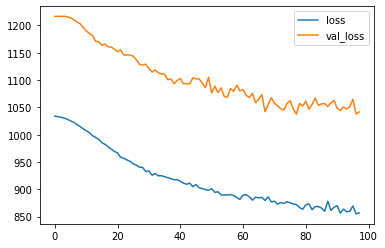

In [8]:
epochs = 400
history = model.fit(
    X_train, y_train,
    validation_split=0.1,
    batch_size=128,
    epochs=epochs,
    callbacks=[early_stopping],
    verbose=1,
)

history_df = pd.DataFrame(history.history)
history_df.loc[0:, ['loss', 'val_loss']].plot()
print(("Minimum Validation Loss: {:0.4f}").format(history_df['val_loss'].min()))

## Testing the model

In [9]:
test_loss = model.evaluate(
    X_test, y_test,
    verbose=0,
)

print('Mean Absolute Error:', test_loss)

Mean Absolute Error: 1045.88330078125
